# Homework-2: MLP for MNIST Classification

### **Deadline: 2018.11.04 23:59:59**

### In this homework, you need to
- #### implement SGD optimizer (`./optimizer.py`)
- #### implement forward and backward for FCLayer (`layers/fc_layer.py`)
- #### implement forward and backward for SigmoidLayer (`layers/sigmoid_layer.py`)
- #### implement forward and backward for ReLULayer (`layers/relu_layer.py`)
- #### implement EuclideanLossLayer (`criterion/euclidean_loss.py`)
- #### implement SoftmaxCrossEntropyLossLayer (`criterion/softmax_cross_entropy.py`)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

from network import Network
from solver import train, test
from plot import plot_loss_and_acc

## Load MNIST Dataset
We use tensorflow tools to load dataset for convenience.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
def decode_image(image):
    # Normalize from [0, 255.] to [0., 1.0], and then subtract by the mean value
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [784])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # Encode label with one-hot encoding
    return tf.one_hot(label, depth=10)

In [4]:
# Data Preprocessing
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))

x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

## Set Hyerparameters
You can modify hyerparameters by yourself.

In [5]:
batch_size = 100
max_epoch = 20
init_std = 0.01

learning_rate_SGD = 0.001
weight_decay = 0.5

disp_freq = 50

## 1. MLP with Euclidean Loss
In part-1, you need to train a MLP with **Euclidean Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively.
### TODO
Before executing the following code, you should complete **./optimizer.py** and **criterion/euclidean_loss.py**.

In [6]:
from criterion import EuclideanLossLayer
from optimizer import SGD

criterion = EuclideanLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 1.1 MLP with Euclidean Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/fc_layer.py** and **layers/sigmoid_layer.py**.

In [7]:
from layers import FCLayer, SigmoidLayer

sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

In [8]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 0.3377	 Accuracy 0.0700
Epoch [0][20]	 Batch [50][550]	 Training Loss 0.4856	 Accuracy 0.1712
Epoch [0][20]	 Batch [100][550]	 Training Loss 0.2674	 Accuracy 0.2347
Epoch [0][20]	 Batch [150][550]	 Training Loss 0.1926	 Accuracy 0.2830
Epoch [0][20]	 Batch [200][550]	 Training Loss 0.1539	 Accuracy 0.3436
Epoch [0][20]	 Batch [250][550]	 Training Loss 0.1299	 Accuracy 0.3937
Epoch [0][20]	 Batch [300][550]	 Training Loss 0.1134	 Accuracy 0.4366
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.1014	 Accuracy 0.4766
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.0922	 Accuracy 0.5112
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.0849	 Accuracy 0.5398
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.0789	 Accuracy 0.5640

Epoch [0]	 Average training loss 0.0740	 Average training accuracy 0.5848
Epoch [0]	 Average validation loss 0.0225	 Average validation accuracy 0.8328

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.0215	 Accuracy 0.8400


Epoch [8]	 Average training loss 0.0166	 Average training accuracy 0.8707
Epoch [8]	 Average validation loss 0.0147	 Average validation accuracy 0.9150

Epoch [9][20]	 Batch [0][550]	 Training Loss 0.0148	 Accuracy 0.9400
Epoch [9][20]	 Batch [50][550]	 Training Loss 0.0159	 Accuracy 0.8843
Epoch [9][20]	 Batch [100][550]	 Training Loss 0.0160	 Accuracy 0.8780
Epoch [9][20]	 Batch [150][550]	 Training Loss 0.0163	 Accuracy 0.8723
Epoch [9][20]	 Batch [200][550]	 Training Loss 0.0163	 Accuracy 0.8737
Epoch [9][20]	 Batch [250][550]	 Training Loss 0.0163	 Accuracy 0.8730
Epoch [9][20]	 Batch [300][550]	 Training Loss 0.0162	 Accuracy 0.8735
Epoch [9][20]	 Batch [350][550]	 Training Loss 0.0164	 Accuracy 0.8717
Epoch [9][20]	 Batch [400][550]	 Training Loss 0.0163	 Accuracy 0.8720
Epoch [9][20]	 Batch [450][550]	 Training Loss 0.0164	 Accuracy 0.8718
Epoch [9][20]	 Batch [500][550]	 Training Loss 0.0164	 Accuracy 0.8716

Epoch [9]	 Average training loss 0.0164	 Average training accuracy 

Epoch [17][20]	 Batch [350][550]	 Training Loss 0.0153	 Accuracy 0.8789
Epoch [17][20]	 Batch [400][550]	 Training Loss 0.0153	 Accuracy 0.8791
Epoch [17][20]	 Batch [450][550]	 Training Loss 0.0153	 Accuracy 0.8788
Epoch [17][20]	 Batch [500][550]	 Training Loss 0.0153	 Accuracy 0.8785

Epoch [17]	 Average training loss 0.0153	 Average training accuracy 0.8788
Epoch [17]	 Average validation loss 0.0131	 Average validation accuracy 0.9188

Epoch [18][20]	 Batch [0][550]	 Training Loss 0.0134	 Accuracy 0.9300
Epoch [18][20]	 Batch [50][550]	 Training Loss 0.0147	 Accuracy 0.8920
Epoch [18][20]	 Batch [100][550]	 Training Loss 0.0149	 Accuracy 0.8847
Epoch [18][20]	 Batch [150][550]	 Training Loss 0.0152	 Accuracy 0.8794
Epoch [18][20]	 Batch [200][550]	 Training Loss 0.0152	 Accuracy 0.8803
Epoch [18][20]	 Batch [250][550]	 Training Loss 0.0151	 Accuracy 0.8806
Epoch [18][20]	 Batch [300][550]	 Training Loss 0.0150	 Accuracy 0.8814
Epoch [18][20]	 Batch [350][550]	 Training Loss 0.0153	

In [9]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9003.



## 1.2 MLP with Euclidean Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/relu_layer.py**.

In [8]:
from layers import ReLULayer

reluMLP = Network()
# TODO build ReLUMLP with FCLayer and ReLULayer
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [11]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 0.2564	 Accuracy 0.1000
Epoch [0][20]	 Batch [50][550]	 Training Loss 0.0671	 Accuracy 0.4947
Epoch [0][20]	 Batch [100][550]	 Training Loss 0.0480	 Accuracy 0.6088
Epoch [0][20]	 Batch [150][550]	 Training Loss 0.0402	 Accuracy 0.6685
Epoch [0][20]	 Batch [200][550]	 Training Loss 0.0355	 Accuracy 0.7099
Epoch [0][20]	 Batch [250][550]	 Training Loss 0.0322	 Accuracy 0.7389
Epoch [0][20]	 Batch [300][550]	 Training Loss 0.0298	 Accuracy 0.7592
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.0279	 Accuracy 0.7742
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.0264	 Accuracy 0.7873
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.0251	 Accuracy 0.7989
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.0241	 Accuracy 0.8076

Epoch [0]	 Average training loss 0.0231	 Average training accuracy 0.8154
Epoch [0]	 Average validation loss 0.0115	 Average validation accuracy 0.9264

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.0114	 Accuracy 0.9400


Epoch [8]	 Average training loss 0.0077	 Average training accuracy 0.9452
Epoch [8]	 Average validation loss 0.0067	 Average validation accuracy 0.9646

Epoch [9][20]	 Batch [0][550]	 Training Loss 0.0072	 Accuracy 0.9500
Epoch [9][20]	 Batch [50][550]	 Training Loss 0.0072	 Accuracy 0.9525
Epoch [9][20]	 Batch [100][550]	 Training Loss 0.0074	 Accuracy 0.9487
Epoch [9][20]	 Batch [150][550]	 Training Loss 0.0076	 Accuracy 0.9468
Epoch [9][20]	 Batch [200][550]	 Training Loss 0.0075	 Accuracy 0.9475
Epoch [9][20]	 Batch [250][550]	 Training Loss 0.0075	 Accuracy 0.9475
Epoch [9][20]	 Batch [300][550]	 Training Loss 0.0075	 Accuracy 0.9472
Epoch [9][20]	 Batch [350][550]	 Training Loss 0.0076	 Accuracy 0.9469
Epoch [9][20]	 Batch [400][550]	 Training Loss 0.0076	 Accuracy 0.9470
Epoch [9][20]	 Batch [450][550]	 Training Loss 0.0076	 Accuracy 0.9471
Epoch [9][20]	 Batch [500][550]	 Training Loss 0.0077	 Accuracy 0.9463

Epoch [9]	 Average training loss 0.0076	 Average training accuracy 

Epoch [17][20]	 Batch [350][550]	 Training Loss 0.0071	 Accuracy 0.9521
Epoch [17][20]	 Batch [400][550]	 Training Loss 0.0071	 Accuracy 0.9523
Epoch [17][20]	 Batch [450][550]	 Training Loss 0.0072	 Accuracy 0.9525
Epoch [17][20]	 Batch [500][550]	 Training Loss 0.0072	 Accuracy 0.9517

Epoch [17]	 Average training loss 0.0072	 Average training accuracy 0.9516
Epoch [17]	 Average validation loss 0.0063	 Average validation accuracy 0.9674

Epoch [18][20]	 Batch [0][550]	 Training Loss 0.0067	 Accuracy 0.9600
Epoch [18][20]	 Batch [50][550]	 Training Loss 0.0067	 Accuracy 0.9590
Epoch [18][20]	 Batch [100][550]	 Training Loss 0.0069	 Accuracy 0.9550
Epoch [18][20]	 Batch [150][550]	 Training Loss 0.0071	 Accuracy 0.9534
Epoch [18][20]	 Batch [200][550]	 Training Loss 0.0070	 Accuracy 0.9538
Epoch [18][20]	 Batch [250][550]	 Training Loss 0.0070	 Accuracy 0.9535
Epoch [18][20]	 Batch [300][550]	 Training Loss 0.0071	 Accuracy 0.9528
Epoch [18][20]	 Batch [350][550]	 Training Loss 0.0071	

In [12]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9531.



## Plot

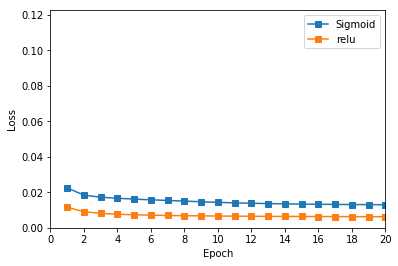

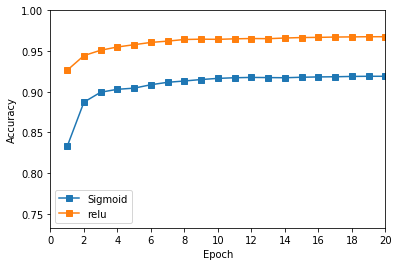

In [13]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 2. MLP with Softmax Cross-Entropy Loss
In part-2, you need to train a MLP with **Softmax Cross-Entropy Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively again.
### TODO
Before executing the following code, you should complete **criterion/softmax_cross_entropy_loss.py**.

In [9]:
from criterion import SoftmaxCrossEntropyLossLayer

criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 2.1 MLP with Softmax Cross-Entropy Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Softmax cross-entropy loss function.

In [10]:
sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

### Train

In [11]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 0.2833	 Accuracy 0.1100
Epoch [0][20]	 Batch [50][550]	 Training Loss 0.2491	 Accuracy 0.1782
Epoch [0][20]	 Batch [100][550]	 Training Loss 0.2357	 Accuracy 0.2480
Epoch [0][20]	 Batch [150][550]	 Training Loss 0.2299	 Accuracy 0.3062
Epoch [0][20]	 Batch [200][550]	 Training Loss 0.2256	 Accuracy 0.3678
Epoch [0][20]	 Batch [250][550]	 Training Loss 0.2222	 Accuracy 0.4203
Epoch [0][20]	 Batch [300][550]	 Training Loss 0.2193	 Accuracy 0.4648
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.2168	 Accuracy 0.5030
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.2147	 Accuracy 0.5354
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.2127	 Accuracy 0.5618
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.2110	 Accuracy 0.5848

Epoch [0]	 Average training loss 0.2093	 Average training accuracy 0.6044
Epoch [0]	 Average validation loss 0.1902	 Average validation accuracy 0.8442

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.1904	 Accuracy 0.8400


Epoch [8]	 Average training loss 0.1795	 Average training accuracy 0.8729
Epoch [8]	 Average validation loss 0.1764	 Average validation accuracy 0.9160

Epoch [9][20]	 Batch [0][550]	 Training Loss 0.1772	 Accuracy 0.9300
Epoch [9][20]	 Batch [50][550]	 Training Loss 0.1781	 Accuracy 0.8847
Epoch [9][20]	 Batch [100][550]	 Training Loss 0.1782	 Accuracy 0.8788
Epoch [9][20]	 Batch [150][550]	 Training Loss 0.1787	 Accuracy 0.8728
Epoch [9][20]	 Batch [200][550]	 Training Loss 0.1788	 Accuracy 0.8743
Epoch [9][20]	 Batch [250][550]	 Training Loss 0.1788	 Accuracy 0.8746
Epoch [9][20]	 Batch [300][550]	 Training Loss 0.1787	 Accuracy 0.8753
Epoch [9][20]	 Batch [350][550]	 Training Loss 0.1790	 Accuracy 0.8738
Epoch [9][20]	 Batch [400][550]	 Training Loss 0.1790	 Accuracy 0.8742
Epoch [9][20]	 Batch [450][550]	 Training Loss 0.1790	 Accuracy 0.8736
Epoch [9][20]	 Batch [500][550]	 Training Loss 0.1790	 Accuracy 0.8736

Epoch [9]	 Average training loss 0.1790	 Average training accuracy 

Epoch [17][20]	 Batch [350][550]	 Training Loss 0.1768	 Accuracy 0.8817
Epoch [17][20]	 Batch [400][550]	 Training Loss 0.1768	 Accuracy 0.8817
Epoch [17][20]	 Batch [450][550]	 Training Loss 0.1769	 Accuracy 0.8816
Epoch [17][20]	 Batch [500][550]	 Training Loss 0.1769	 Accuracy 0.8814

Epoch [17]	 Average training loss 0.1769	 Average training accuracy 0.8816
Epoch [17]	 Average validation loss 0.1738	 Average validation accuracy 0.9208

Epoch [18][20]	 Batch [0][550]	 Training Loss 0.1747	 Accuracy 0.9400
Epoch [18][20]	 Batch [50][550]	 Training Loss 0.1757	 Accuracy 0.8925
Epoch [18][20]	 Batch [100][550]	 Training Loss 0.1759	 Accuracy 0.8860
Epoch [18][20]	 Batch [150][550]	 Training Loss 0.1764	 Accuracy 0.8816
Epoch [18][20]	 Batch [200][550]	 Training Loss 0.1765	 Accuracy 0.8829
Epoch [18][20]	 Batch [250][550]	 Training Loss 0.1765	 Accuracy 0.8829
Epoch [18][20]	 Batch [300][550]	 Training Loss 0.1764	 Accuracy 0.8840
Epoch [18][20]	 Batch [350][550]	 Training Loss 0.1767	

### Test

In [12]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9024.



## 2.2 MLP with Softmax Cross-Entropy Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Softmax cross-entropy loss function.

In [13]:
reluMLP = Network()
# Build ReLUMLP with FCLayer and ReLULayer
# 128 is the number of hidden units, you can change by your own
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [14]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 0.2557	 Accuracy 0.1000
Epoch [0][20]	 Batch [50][550]	 Training Loss 0.2123	 Accuracy 0.4625
Epoch [0][20]	 Batch [100][550]	 Training Loss 0.2029	 Accuracy 0.5876
Epoch [0][20]	 Batch [150][550]	 Training Loss 0.1974	 Accuracy 0.6535
Epoch [0][20]	 Batch [200][550]	 Training Loss 0.1935	 Accuracy 0.6982
Epoch [0][20]	 Batch [250][550]	 Training Loss 0.1903	 Accuracy 0.7296
Epoch [0][20]	 Batch [300][550]	 Training Loss 0.1879	 Accuracy 0.7532
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.1860	 Accuracy 0.7707
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.1843	 Accuracy 0.7855
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.1829	 Accuracy 0.7975
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.1818	 Accuracy 0.8070

Epoch [0]	 Average training loss 0.1807	 Average training accuracy 0.8153
Epoch [0]	 Average validation loss 0.1659	 Average validation accuracy 0.9278

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.1668	 Accuracy 0.9400


Epoch [8]	 Average training loss 0.1631	 Average training accuracy 0.9456
Epoch [8]	 Average validation loss 0.1601	 Average validation accuracy 0.9630

Epoch [9][20]	 Batch [0][550]	 Training Loss 0.1599	 Accuracy 0.9500
Epoch [9][20]	 Batch [50][550]	 Training Loss 0.1618	 Accuracy 0.9551
Epoch [9][20]	 Batch [100][550]	 Training Loss 0.1622	 Accuracy 0.9495
Epoch [9][20]	 Batch [150][550]	 Training Loss 0.1626	 Accuracy 0.9483
Epoch [9][20]	 Batch [200][550]	 Training Loss 0.1626	 Accuracy 0.9491
Epoch [9][20]	 Batch [250][550]	 Training Loss 0.1626	 Accuracy 0.9486
Epoch [9][20]	 Batch [300][550]	 Training Loss 0.1627	 Accuracy 0.9478
Epoch [9][20]	 Batch [350][550]	 Training Loss 0.1628	 Accuracy 0.9474
Epoch [9][20]	 Batch [400][550]	 Training Loss 0.1628	 Accuracy 0.9476
Epoch [9][20]	 Batch [450][550]	 Training Loss 0.1629	 Accuracy 0.9477
Epoch [9][20]	 Batch [500][550]	 Training Loss 0.1630	 Accuracy 0.9467

Epoch [9]	 Average training loss 0.1629	 Average training accuracy 

Epoch [17][20]	 Batch [350][550]	 Training Loss 0.1622	 Accuracy 0.9522
Epoch [17][20]	 Batch [400][550]	 Training Loss 0.1622	 Accuracy 0.9522
Epoch [17][20]	 Batch [450][550]	 Training Loss 0.1622	 Accuracy 0.9525
Epoch [17][20]	 Batch [500][550]	 Training Loss 0.1624	 Accuracy 0.9517

Epoch [17]	 Average training loss 0.1623	 Average training accuracy 0.9518
Epoch [17]	 Average validation loss 0.1596	 Average validation accuracy 0.9660

Epoch [18][20]	 Batch [0][550]	 Training Loss 0.1591	 Accuracy 0.9500
Epoch [18][20]	 Batch [50][550]	 Training Loss 0.1612	 Accuracy 0.9586
Epoch [18][20]	 Batch [100][550]	 Training Loss 0.1615	 Accuracy 0.9537
Epoch [18][20]	 Batch [150][550]	 Training Loss 0.1619	 Accuracy 0.9528
Epoch [18][20]	 Batch [200][550]	 Training Loss 0.1619	 Accuracy 0.9537
Epoch [18][20]	 Batch [250][550]	 Training Loss 0.1619	 Accuracy 0.9536
Epoch [18][20]	 Batch [300][550]	 Training Loss 0.1620	 Accuracy 0.9529
Epoch [18][20]	 Batch [350][550]	 Training Loss 0.1621	

In [15]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9534.



## Plot

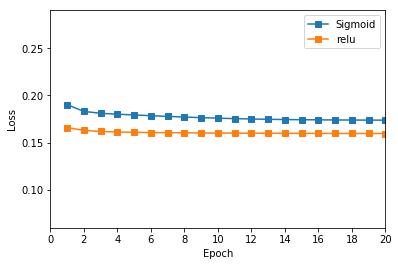

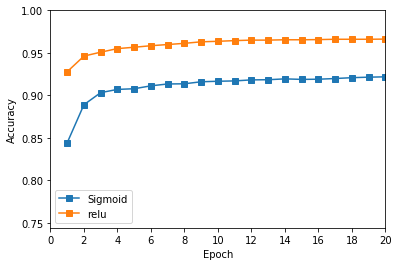

In [16]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

### ~~You have finished homework-2, congratulations!~~  

**Next, according to the requirements 4) of experiment report:**
### **You need to construct a two-hidden-layer MLP, using any activation function and loss function.**

**Note: Please insert some new cells blow (using '+' bottom in the toolbar) refer to above codes. Do not modify the former code directly.**

In [17]:
reluMLP = Network()
# Build ReLUMLP with FCLayer and ReLULayer
# 128 is the number of hidden units, you can change by your own
reluMLP.add(FCLayer(784, 256))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(256, 64))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(64, 10))

In [18]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 0.2553	 Accuracy 0.1500
Epoch [0][20]	 Batch [50][550]	 Training Loss 0.2212	 Accuracy 0.3712
Epoch [0][20]	 Batch [100][550]	 Training Loss 0.2130	 Accuracy 0.4966
Epoch [0][20]	 Batch [150][550]	 Training Loss 0.2074	 Accuracy 0.5649
Epoch [0][20]	 Batch [200][550]	 Training Loss 0.2029	 Accuracy 0.6161
Epoch [0][20]	 Batch [250][550]	 Training Loss 0.1992	 Accuracy 0.6571
Epoch [0][20]	 Batch [300][550]	 Training Loss 0.1962	 Accuracy 0.6890
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.1938	 Accuracy 0.7139
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.1916	 Accuracy 0.7338
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.1898	 Accuracy 0.7508
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.1882	 Accuracy 0.7639

Epoch [0]	 Average training loss 0.1868	 Average training accuracy 0.7761
Epoch [0]	 Average validation loss 0.1693	 Average validation accuracy 0.9280

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.1699	 Accuracy 0.9300


Epoch [8]	 Average training loss 0.1613	 Average training accuracy 0.9546
Epoch [8]	 Average validation loss 0.1584	 Average validation accuracy 0.9678

Epoch [9][20]	 Batch [0][550]	 Training Loss 0.1587	 Accuracy 0.9600
Epoch [9][20]	 Batch [50][550]	 Training Loss 0.1601	 Accuracy 0.9624
Epoch [9][20]	 Batch [100][550]	 Training Loss 0.1605	 Accuracy 0.9582
Epoch [9][20]	 Batch [150][550]	 Training Loss 0.1609	 Accuracy 0.9565
Epoch [9][20]	 Batch [200][550]	 Training Loss 0.1609	 Accuracy 0.9569
Epoch [9][20]	 Batch [250][550]	 Training Loss 0.1609	 Accuracy 0.9567
Epoch [9][20]	 Batch [300][550]	 Training Loss 0.1610	 Accuracy 0.9558
Epoch [9][20]	 Batch [350][550]	 Training Loss 0.1611	 Accuracy 0.9559
Epoch [9][20]	 Batch [400][550]	 Training Loss 0.1611	 Accuracy 0.9562
Epoch [9][20]	 Batch [450][550]	 Training Loss 0.1611	 Accuracy 0.9561
Epoch [9][20]	 Batch [500][550]	 Training Loss 0.1612	 Accuracy 0.9555

Epoch [9]	 Average training loss 0.1611	 Average training accuracy 

Epoch [17][20]	 Batch [350][550]	 Training Loss 0.1603	 Accuracy 0.9591
Epoch [17][20]	 Batch [400][550]	 Training Loss 0.1603	 Accuracy 0.9592
Epoch [17][20]	 Batch [450][550]	 Training Loss 0.1603	 Accuracy 0.9591
Epoch [17][20]	 Batch [500][550]	 Training Loss 0.1604	 Accuracy 0.9585

Epoch [17]	 Average training loss 0.1604	 Average training accuracy 0.9586
Epoch [17]	 Average validation loss 0.1578	 Average validation accuracy 0.9708

Epoch [18][20]	 Batch [0][550]	 Training Loss 0.1579	 Accuracy 0.9700
Epoch [18][20]	 Batch [50][550]	 Training Loss 0.1593	 Accuracy 0.9647
Epoch [18][20]	 Batch [100][550]	 Training Loss 0.1597	 Accuracy 0.9611
Epoch [18][20]	 Batch [150][550]	 Training Loss 0.1601	 Accuracy 0.9599
Epoch [18][20]	 Batch [200][550]	 Training Loss 0.1600	 Accuracy 0.9602
Epoch [18][20]	 Batch [250][550]	 Training Loss 0.1600	 Accuracy 0.9600
Epoch [18][20]	 Batch [300][550]	 Training Loss 0.1601	 Accuracy 0.9592
Epoch [18][20]	 Batch [350][550]	 Training Loss 0.1602	

In [19]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9582.



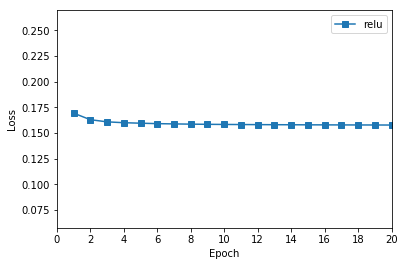

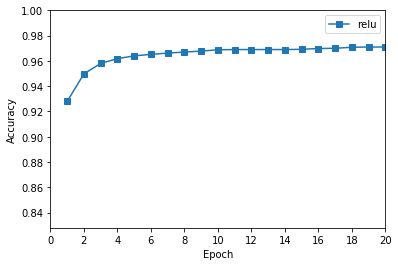

In [20]:
plot_loss_and_acc({'relu': [relu_loss, relu_acc]})

In [27]:
import numpy as np
a1=np.array([[3,2,3],[2,3,5]],dtype=int)
a2=np.array([1,2,3],dtype=int)
print (a1/a2)


[[3.         1.         1.        ]
 [2.         1.5        1.66666667]]
